Logist Regression

Input: $$
X =
  \begin{bmatrix}
  1 & 2 & \cdots & 3\\
  4 & 4 & \cdots & 6\\
  7 & 8 & \cdots & 9\\
  \vdots & \vdots & \ddots & \vdots \\
  11 & 12& \cdots & 13\\
  \end{bmatrix}_{m*n}
,
Y =
  \begin{bmatrix}
  1\\
  0\\
  1\\
  \vdots\\
  1\\
  \end{bmatrix}_{m*1}
$$

Hypothesis: $$
  H_\theta(x) = g(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-\theta^T X}} \tag{1}
$$

  
Linear function: $$
  z = \theta^T X, \quad z \in (-\infty, \infty) \tag{2}
$$

Sigmoid function: $$
  g(z) = \frac{1}{1+e^{-z}}, \quad g(z) \in (0, 1) \tag{3}
$$

| z $\geq$ 0 | z < 0 |
| :-: | :-: |
| $\theta^T X$ $\geq$ 0 | $\theta^T X$ < 0 |
| $h_\theta(x)$ $\geq$ 0.5 | $h_\theta(x)$ < 0.5 |
| **g(z)** $\geq$ 0.5 | **g(z)** < 0.5 |
| **y** = 1 | **y** = 0 |

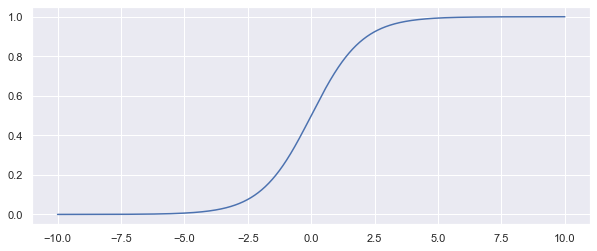

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

z = np.linspace(-10, 10, 1000)
g = 1 / (1 + np.e ** -z)
fig, ax = plt.subplots(figsize=(10, 4))
sns.lineplot(x='z', y='g(z)', data={'z': z, 'g(z)': g})


$H_\theta(x)$ 被Sigmoid函数归一化到(0,1)，表示结果分类结果为True的概率。

$$
\begin{align}
P(y=1|x;\theta) &= H_\theta(x) \\
P(y=0|x;\theta) &= 1 - H_\theta(x)
\end{align}
$$
Combine: $$
P(y|x;\theta) = (H_\theta(x))^y (1 - H_\theta(x))^{1-y} \tag{4}
$$


All samples are independent, Maximum likelihood function: $$
\begin{align}
  \theta^* = \operatorname*{arg\ max}_{\theta}\ L(\theta) &= \prod_{j=0}^{m} p(y^j|x^j;\theta) \\
  &= \prod_{j=0}^{m} (H_\theta(x)^j)^y \, (1-H_\theta(x)^j)^{1-y} \tag{5}
\end{align}
$$

Log transformation, the form of cross engropy: $$
\begin{align}
  \ell(\theta) &= \log(L(\theta)) \\
  &= \sum_{j=0}^{m} y^j\ log(H_\theta(x)^j) + (1-y^j)\ log(1-H_\theta(x)^j) \tag{6} \\
\end{align}
$$


Partial Derivative for every $\theta$: $$
\begin{align}
  \frac{\partial \ell(\theta)}{\partial \theta_i} &= \sum_{j=0}^{m} (y^j \frac{1}{H_\theta(x)^j} + (1-y^j) \frac{0-1}{1-H_\theta(x)^j}) \frac{\partial}{\partial \theta_i} H_\theta(x)^j \\
        &= \sum_{j=0}^{m} (y^j \frac{1}{H_\theta(x)^j} - (1-y^j) \frac{1}{1-H_\theta(x)^j}) \frac{\partial}{\partial \theta_i} H_\theta(x)^j \\
  \because g'(z) &= \frac{e^{-z}}{(1+e^{-z})^2} \\
        &= \frac{1}{1+e^{-z}} \cdot \frac{e^{-z}}{1+e^{-z}} \\
        &= g(z) \cdot (1-g(z)) \\
  \therefore \frac{\partial \ell(\theta)}{\partial \theta_i} &= \sum_{j=0}^{m} (y^j \frac{1}{H_\theta(x)^j} - (1-y^j) \frac{1}{1-H_\theta(x)^j})\ H_\theta(x)^j\ (1-H_\theta(x)^j)\ x_i^j \\
  &= \sum_{j=0}^{m} (y^j(1-H_\theta(x)^j) - (1-y^j)H_\theta(x)^j)\ x_i^j \\
  &= \sum_{j=0}^{m} (y^j - H_\theta(x)^j)\ x_i^j
\end{align}
$$

Gradient ascent to optimise $\theta$: $$
  \theta_i = \theta_i + \sum\limits_{j=0}^m (y^j - H_\theta(x)^j) x_i^j
$$